# **Question 1**

Iris Dataset

In [3]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [4]:
df = pd.read_csv('sample_data/iris.data') 
print(df.shape)
df.describe()

(150, 5)


,s_len,s_wid,p_len,p_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
target_column = ['class'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,s_len,s_wid,p_len,p_wid
count,150.000000,150.000000,150.000000,150.000000
mean,0.739662,0.694091,0.544734,0.479467
std,0.104818,0.098544,0.255713,0.305264
min,0.544304,0.454545,0.144928,0.040000
25%,0.645570,0.636364,0.231884,0.120000
50%,0.734177,0.681818,0.630435,0.520000
75%,0.810127,0.750000,0.739130,0.720000
max,1.000000,1.000000,1.000000,1.000000


In [6]:
X = df[predictors].values
df['class'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
                        [0, 1, 2], inplace=True)
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(105, 4)
(45, 4)


In [7]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

3


In [8]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=4))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
# build the model
md = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 120ms/step - loss: 1.2794 - accuracy: 0.3214 - val_loss: 1.1312 - val_accuracy: 0.4286
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1508 - accuracy: 0.3214 - val_loss: 1.1135 - val_accuracy: 0.5238
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1018 - accuracy: 0.4405 - val_loss: 1.1298 - val_accuracy: 0.2381
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0955 - accuracy: 0.3571 - val_loss: 1.1418 - val_accuracy: 0.2381
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0856 - accuracy: 0.4286 - val_loss: 1.1305 - val_accuracy: 0.5714
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 1.0806 - accuracy: 0.6667 - val_loss: 1.1117 - val_accuracy: 0.5714
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0676 - accuracy: 0.6310 - val_loss: 1.0889 - val_accuracy: 0.5714
Epoch 8/100
3/3 [==

In [10]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

4/4 [==============================] - 0s 4ms/step
Accuracy on training data: 0.9523809552192688% 
 Error on training data: 0.0476190447807312
2/2 [==============================] - 0s 5ms/step
Accuracy on test data: 0.9777777791023254% 
 Error on test data: 0.02222222089767456


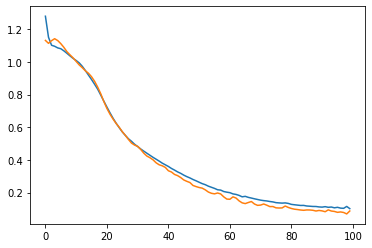

In [11]:
import matplotlib.pyplot as plt

plt.plot(md.history['loss'])
plt.plot(md.history['val_loss'])

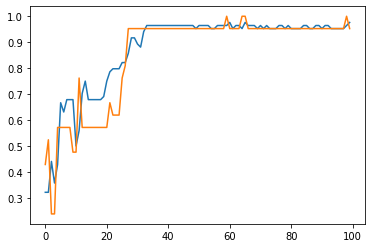

In [12]:
plt.plot(md.history['accuracy'])
plt.plot(md.history['val_accuracy'])

# **Question 2**
Breast Cancer Dataset

In [13]:
df2 = pd.read_csv('sample_data/wdbc.data', header=None) 
print(df2.shape)
df2.drop(df2.columns[0], axis=1, inplace=True)
df2.replace(('M', 'B'), (1, 0), inplace=True)
df2.head()
df2.describe()

(569, 32)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [14]:
X = df2.drop(df2.columns[[0]],axis = 1)
y = df2.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape); print(X_test.shape)

(398, 30)
(171, 30)


In [15]:
model = Sequential()
model.add(Dense(500, activation='sigmoid', input_dim=30))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [16]:
# build the model
md = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 29ms/step - loss: 0.6520 - accuracy: 0.6006 - val_loss: 0.6463 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5852 - accuracy: 0.7107 - val_loss: 0.5563 - val_accuracy: 0.8125
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4965 - accuracy: 0.8711 - val_loss: 0.4555 - val_accuracy: 0.8750
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3883 - accuracy: 0.8931 - val_loss: 0.3644 - val_accuracy: 0.8875
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3131 - accuracy: 0.9025 - val_loss: 0.3162 - val_accuracy: 0.9125
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2665 - accuracy: 0.9088 - val_loss: 0.3011 - val_accuracy: 0.8875
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2448 - accuracy: 0.9088 - val_loss: 0.2756 - val_accuracy: 0.9000
Epoch 8/100


In [17]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  

13/13 [==============================] - 0s 2ms/step
Accuracy on training data: 0.9396985173225403% 
 Error on training data: 0.06030148267745972
6/6 [==============================] - 0s 2ms/step
Accuracy on test data: 0.9181286692619324% 
 Error on test data: 0.08187133073806763


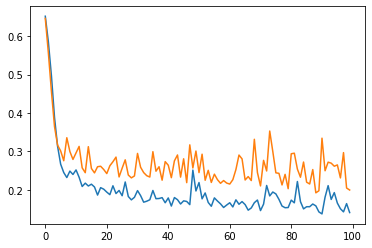

In [18]:
plt.plot(md.history['loss'])
plt.plot(md.history['val_loss'])

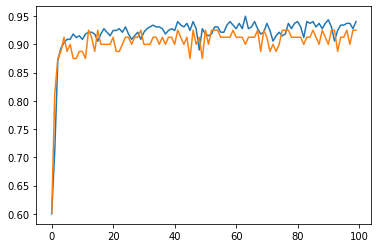

In [19]:
plt.plot(md.history['accuracy'])
plt.plot(md.history['val_accuracy'])

# **Question 3**
Bank Dataset

In [60]:
df3 = pd.read_csv('sample_data/bank-full.csv', delimiter=';') 
print(df3.shape)
df3.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [61]:
df3.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df3.default.replace(('yes', 'no'), (1, 0), inplace=True)
df3.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df3.y.replace(('yes', 'no'), (1, 0), inplace=True)
df3.contact.replace(('unknown', 'telephone', 'cellular'), (0, 1, 2), inplace=True)
df3.marital.replace(('married', 'divorced', 'single'), (0, 1, 2), inplace=True)
df3.education.replace(('unknown', 'primary', 'secondary', 'tertiary'), (0, 1, 2, 3), inplace=True)
df3.poutcome.replace(('unknown', 'other', 'failure', 'success'), (0, 1, 2, 3, ), inplace=True)
df3.month.replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df3.job.replace(("admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services"), (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,0,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,11,2,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,6,0,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,8,0,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,2,2,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


In [62]:
target_column = ['y'] 
predictors = list(set(list(df3.columns))-set(target_column))
df3.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,7.018159,0.680963,2.060516,0.018027,1362.272058,0.555838,0.160226,1.359758,15.806419,6.144655,258.163080,2.763841,40.197828,0.580323,0.357767,0.116985
std,10.618762,3.543218,0.884908,0.778704,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,2.408034,257.527812,3.098021,100.128746,2.303441,0.804435,0.321406
min,18.000000,1.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,0.000000,2.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,8.000000,0.000000,2.000000,0.000000,448.000000,1.000000,0.000000,2.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000
75%,48.000000,11.000000,2.000000,3.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000
max,95.000000,12.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [63]:
X = df3[predictors].values
y = df3[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape);print(X_test.shape)

(31647, 16)
(13564, 16)


In [64]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_dim=16))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                272       
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [66]:
md = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
792/792 [==============================] - 2s 2ms/step - loss: 0.3553 - accuracy: 0.8840 - val_loss: 0.3336 - val_accuracy: 0.8809
Epoch 2/100
792/792 [==============================] - 2s 2ms/step - loss: 0.3098 - accuracy: 0.8840 - val_loss: 0.3019 - val_accuracy: 0.8809
Epoch 3/100
792/792 [==============================] - 2s 2ms/step - loss: 0.3024 - accuracy: 0.8838 - val_loss: 0.2994 - val_accuracy: 0.8809
Epoch 4/100
792/792 [==============================] - 2s 2ms/step - loss: 0.2978 - accuracy: 0.8841 - val_loss: 0.3013 - val_accuracy: 0.8817
Epoch 5/100
792/792 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8834 - val_loss: 0.2960 - val_accuracy: 0.8809
Epoch 6/100
792/792 [==============================] - 2s 2ms/step - loss: 0.2927 - accuracy: 0.8842 - val_loss: 0.2929 - val_accuracy: 0.8826
Epoch 7/100
792/792 [==============================] - 2s 2ms/step - loss: 0.2902 - accuracy: 0.8828 - val_loss: 0.2948 - val_accuracy: 0.8821

In [67]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1])) 

989/989 [==============================] - 3s 3ms/step
Accuracy on training data: 0.8889310359954834% 
 Error on training data: 0.1110689640045166
424/424 [==============================] - 1s 3ms/step
Accuracy on test data: 0.8850634098052979% 
 Error on test data: 0.11493659019470215


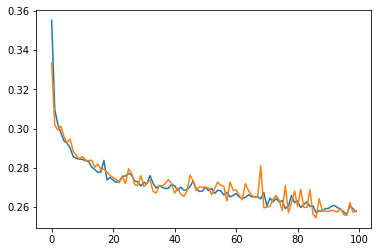

In [68]:
plt.plot(md.history['loss'])
plt.plot(md.history['val_loss'])

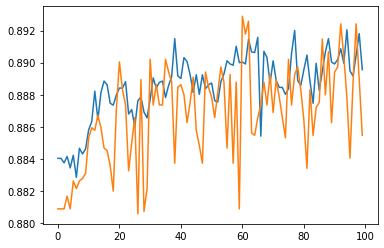

In [69]:
plt.plot(md.history['accuracy'])
plt.plot(md.history['val_accuracy'])